# **Author : Amogh Raina**

## **Task 1 : Prediction using Supervised Machine Learning**

### **GRIP @ The Sparks Foundation**

### In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
###This is a simple linear regression task as it involves just two variables.  

 

**Importing the necessary ibraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading the data**

In [2]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data import successful")

df.head(10)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Data Visualization**

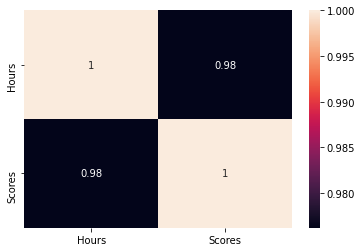

In [6]:
sns.heatmap(df.corr(),annot=True)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

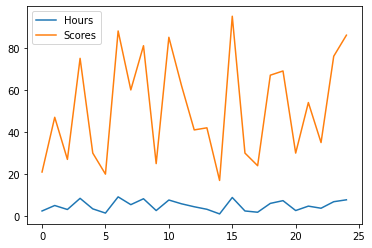

In [34]:
plt.figure(figsize=(10,8))
df.plot()

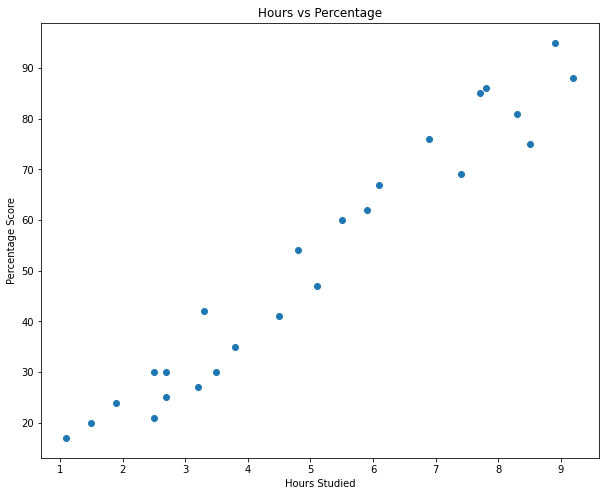

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(x=df.Hours,y=df.Scores,cmap='plasma')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Data Preprocessing**

In [9]:
X = df.Hours.values
y = df.Scores.values

In [10]:
## Importing the ML libraries needed from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape)
print(y_train.shape)

(20,)
(20,)


In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lr.intercept_)

2.018160041434662


In [16]:
lr.coef_

array([9.91065648])

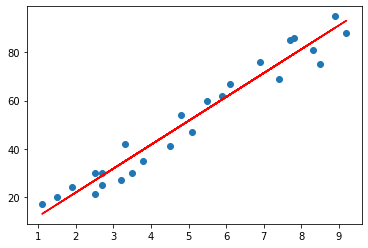

In [23]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

**Predictions**

In [18]:
predictions = lr.predict(X_test.reshape(-1,1))

In [19]:
predictions

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

** Comparing Actual result to the Predicted Model result**

In [25]:
# Comparing Actual vs Predicted
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) 
df_1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
#Estimating training and test score
print("Training Score:",lr.score(X_train.reshape(-1,1),y_train))
print("Test Score:",lr.score(X_test.reshape(-1,1),y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


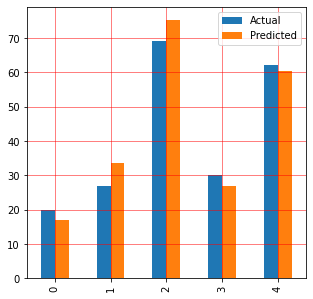

In [30]:

# Plotting the Bar graph to depict the difference between the actual and predicted value

df_1.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [32]:

# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-2:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
